# Assignment 2 for FIT5201, Semester 1

**Student Name:**  Siaohsuan, Jiang

**Student ID:**    33029229

# 1 Document Clustering

## Question 1

### I. Derive Expectation and Maximization steps of the hard-EM algorithm for Document Clustering, show your work in your submitted PDF report. In particular, include all model parameters that should be learnt and the exact expression (using the same math convention that we saw in the Module 4) that should be used to update these parameters during the learning process (ie., E step, M step and assignments).



The probability of the observed documents is

\begin{aligned}
p\left(d_1, \ldots, d_N\right)& = \prod_{n=1}^N p\left(d_n\right) \\
& =\prod_{n=1}^N \sum_{k=1}^K p\left(z_{n, k}=1, d_n\right) \\
& =\prod_{n=1}^N \sum_{k=1}^K\left(\varphi_k \prod_{w \in \mathcal{A}} \mu_{k, w}^{c\left(w, d_n\right)}\right)
\end{aligned}

where

\begin{aligned}
& \varphi=\left(\varphi_1, \varphi_2, \ldots, \varphi_K\right) \text { is the proportion for the clusters, } 1 \geq \varphi_k \geq 0 \text { and } \sum_{k=1}^K \varphi_k=1 \\
& \mu_k=\left(\mu_{k, 1}, \mu_{k, 2}, \ldots, \mu_{k,\|\mathcal{A}\|}\right) \text { is the word proportion for each cluster, with } 1 \geq \mu_{k, w} \geq 0 \text { and } \sum_{w \in \mathcal{A}} \mu_{k, w}=1 
\end{aligned}

For example, if there are three clusters, and 12 documents, and in a certain iteration, 12 docments are evenly clustered to 3 clusters, then $\varphi_1 = \varphi_2 = \varphi_3 = \frac{1}{3}$. For the meaning of$\mu$, $\mu_k$ represents $\frac{\text{the frequency of a certain word in cluster k}}{\text{sum of all words counts in the cluster k}}$, and the sample space of the words is written as $ \|\mathcal{A}\|$.
The documents clusters are not given to us so the latent variables $z_1,z_2,...,z_N$ are unseen.  

We write the log-likelihood of the probability of the observed documents is:

\begin{aligned}
\ln p\left(d_1, \ldots, d_N\right) & =\sum_{n=1}^N \ln p\left(d_n\right) \\
& =\sum_{n=1}^N \ln \sum_{k=1}^K p\left(z_{n, k}=1, d_n\right) \\
& =\sum_{n=1}^N \ln \sum_{k=1}^K\left(\varphi_k \prod_{w \in \mathcal{A}} \mu_{k, w}^{c\left(w, d_n\right)}\right)
\end{aligned}


Take the Q function, which will be the basis of the EM algorithms.

\begin{aligned}
Q\left(\boldsymbol{\theta}, \boldsymbol{\theta}^{\text {old }}\right) & =\sum_{n=1}^N \sum_{k=1}^K p\left(z_{n, k}=1 \mid d_n, \boldsymbol{\theta}^{\text {old }}\right) \ln p\left(z_{n, k}=1, d_n \mid \boldsymbol{\theta}\right) \\
& =\sum_{n=1}^N \sum_{k=1}^K p\left(z_{n, k}=1 \mid d_n, \boldsymbol{\theta}^{\text {old }}\right)\left(\ln \varphi_k+\sum_{w \in \mathcal{A}} c\left(w, d_n\right) \ln \mu_{k, w}\right) \\
& =\sum_{n=1}^N \sum_{k=1}^K \gamma\left(z_{n, k}\right)\left(\ln \varphi_k+\sum_{w \in \mathcal{A}} c\left(w, d_n\right) \ln \mu_{k, w}\right)
\end{aligned}


where the collection of model parameters is
$$\boldsymbol{\theta}=\left(\boldsymbol{\varphi}, \boldsymbol{\mu}_1, \ldots, \boldsymbol{\mu}_K\right)$$
, and the responsibility factors are
$$\gamma\left(z_n, k\right)=p\left(z_{n, k}=1 \mid d_n, \boldsymbol{\theta}^{\text {old }}\right)$$



In the case of hard-EM algorithm, each data is assigned to the class with the largest posterior probability. Thus:
$$
Z^* \leftarrow \operatorname{argmax}_z \gamma\left(z_{n, k}\right)=\operatorname{argmax}_z p\left(z_{n, k}=1 \mid d_n, \theta^{o l d}\right)
$$



what setting the partial derivatives to zero leads to the following solutions for the parameters:  \
The cluster proportion: 
$$\varphi_k^{n e w}=\frac{N_k}{N}$$ 

where 

$$N_k=\sum_{n=1}^N z_{n, k=Z^*}$$
We can get the new word proportion for each cluster: 
$$\mu_{k, w}^{n e w}=\frac{\sum_{n=1}^N z_{n, k=Z^* c}\left(w, d_n\right)}{\sum_{w^{\prime} \in \mathcal{A}} \sum_{n=1}^N z_{n, k=Z^*} c\left(w^{\prime}, d_n\right)} $$ 


In the final step, assign $\theta^{new}$ to $\theta^{old}$:
$$\theta^{new} = \theta^{old}$$
, and start a new iteration until the convergence condition is met.


### II. Load necessary packages.

In [1]:
import numpy as np
np.errstate(overflow="ignore")
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_spd_matrix
from scipy.stats import multivariate_normal

### III. Load Task2A.txt file (if needed, perform text preprocessing similar to what we did in Activity 4.2).

In [2]:
## read the file (each line of the text file is one document)
with open('Data_set_S1_2023/Task2A.txt', 'r') as file:
    text = file.readlines()

In [3]:
# looks like each line is a label followed by an article separated by \t. Verify that is the case for all the lines
all([length == 2 for length in [len(line.split('\t')) for line in text]])

True

In [4]:
# separate labels from articles
labels, articles = [line.split('\t')[0].strip() for line in text], [line.split('\t')[1].strip() for line in text]
# put in a dataframe
docs = pd.DataFrame(data = zip(labels,articles), columns=['label', 'article'])
docs.label = docs.label.astype('category')
print(docs.shape)
docs.head()

(2373, 2)


,label,article
0,sci.crypt,ripem frequently asked questions archive name ...
1,sci.crypt,ripem frequently asked questions archive name ...
2,sci.crypt,ripem frequently noted vulnerabilities archive...
3,sci.crypt,certifying authority question answered if you ...
4,sci.crypt,rubber hose cryptanalysis some sick part of me...


Feature Extractions

In [414]:
# # Instantiate a countvectorizer
# cv = CountVectorizer(lowercase=True,
#                      stop_words='english',
#                      min_df=5) # As there are too many terms with very low frequency of occurrence, we reduce the sparcity of the feature space by filtering out very low frequency terms.

# # fitting the count vectoriser and obtaining our count features
# features = cv.fit_transform(raw_documents=docs.article.values)

# # visualize how the features look like - very sparse as we can see
# pd.DataFrame(data=features.toarray(), columns=cv.get_feature_names_out()).head()

In [324]:
tfidf = TfidfVectorizer(lowercase=True,
                     stop_words='english',
                     min_df=5,
                    norm='l2')  # note that specifying the norm will normalise the data for us
# fitting the count vectoriser and obtaining our count features
features = tfidf.fit_transform(raw_documents=docs.article.values)

# visualize how the features look like - very sparse as we can see but now it is float values
pd.DataFrame(data=features.toarray(), columns=tfidf.get_feature_names_out()).head()

,aa,aaron,ab,abandoned,abbreviation,abc,abdominal,abiding,ability,able,...,zimmerman,zimmermann,zinc,zip,zisfein,zmodem,zone,zoo,zoology,zv
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018392,...,0.0,0.018345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013762,...,0.0,0.013726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### IV. Implement the hard-EM (you derived above) and soft-EM (derived in Chapter 5 of Module 4). Please provide enough comments in your submitted code. Hint: If it helps, feel free to base your code on the provided code for EM algorithm for GMM in Activity 4.1).

In [361]:
class SoftGMM:
    

    def __init__(self, K, tau_max=200, epsilon=0.01):
        self.K = K               # number of GMM clusters
        self.tau_max = tau_max   # max number of iterations
        self.epsilon = epsilon  # minimum acceptable error rate
        
        self.Psi_hat = None     # placeholder for mixing ratio
        self.Nk_hat = None      # placeholder for cluster member effective counts
        self.Mu_hat = None      # placeholder for cluster means
        self.Sigma_hat = None      # placeholder for covariance matrix
        
    def fit(self, x):
        N = x.shape[0]
        D = x.shape[1]
        ## initialization:
        self.Psi_hat = np.array([1/self.K] * self.K)                         # assume all clusters have the same prob (we will update this later on)
        self.Nk_hat = self.Psi_hat * N
        self.Mu_hat = x[np.random.choice(N, size=self.K, replace=False)]   # randomly  choose K samples as cluster means (any better idea?)
        self.Sigma_hat = np.array([np.eye(D) for _ in range(self.K)])     # create identity covariance matrices as initialization
        gamma = np.ones((N,self.K))                                     # empty posterior matrix (the membership estimates will be stored here)        
        
        terminate= False
        tau = 1
        # fitting loop - we iteratively take E and M steps until the termination criterion is met.
        Mu_hat_old = self.Mu_hat # Mu_hat_old is used to store the last iteration value for mu_hat
        while (not terminate):
            # E step:
            for k in range(self.K):
                ## calculate the posterior based on the estimated means,covariance and cluster size:
                gamma[:,k] = self.Psi_hat[k] * multivariate_normal.pdf(x, mean=self.Mu_hat[k], cov=self.Sigma_hat[k], allow_singular=True) # 
            
            ## address [0, 0, 0, ...]
            gamma[(gamma.sum(axis=1,keepdims=True) == 0).squeeze()] = np.array([1/self.K]*self.K)

            gamma = gamma/gamma.sum(axis=1,keepdims=True) # normalization (to make sure sum(gamma)=1)

            # M step (note that we use the vectorised notation directly which is much better and faster than using a for loop):
            self.Nk_hat = gamma.sum(axis=0)
            self.Psi_hat = self.Nk_hat/N
            self.Mu_hat = (gamma.T @ x)/ self.Nk_hat.reshape((-1,1))

            # only Sigma must be calculated in a loop because it involves element wise multiplication with gamma
            for k in range(self.K):
                Ɣ = gamma[:,k,None]   #this None is to reshape the array to a singleton
                # apply formula
                self.Sigma_hat[k] = 1/self.Nk_hat[k] * ( (x - self.Mu_hat[k]).T @ (Ɣ * (x - self.Mu_hat[k])) )

            # increase iteration counter
            tau +=1

            # check termination condition
            terminate = tau == self.tau_max or np.allclose(self.Mu_hat, Mu_hat_old, rtol= self.epsilon)
            # record the means (neccessary for checking the termination criteria)
            Mu_hat_old = self.Mu_hat
        print(f'Converged in {tau} iterations')
        
        
    # In a clustering-context, `predict` is equivalent to obtaining cluster assignments for new data
    def predict(self, x):
        N = x.shape[0]
        gamma = np.zeros((N,self.K))
        for k in range(self.K):
            ## calculate the posterior based on the estimated means,covariance and cluster size:
            gamma[:,k] = self.Psi_hat[k] * multivariate_normal.pdf(x, mean=self.Mu_hat[k], cov=self.Sigma_hat[k], allow_singular=True)
        gamma = gamma/gamma.sum(axis=1,keepdims=True) # normalization (to make sure sum(gamma)=1)
        
        return gamma


In [316]:
class HardGMM:

    def __init__(self, K, tau_max=100, epsilon=0.01):
        self.K = K               # number of GMM clusters
        self.tau_max = tau_max   # max number of iterations
        self.epsilon = epsilon  # minimum acceptable error rate
        
        self.Psi_hat = None     # placeholder for mixing ratio
        self.Nk_hat = None      # placeholder for cluster member effective counts
        self.Mu_hat = None      # placeholder for cluster means
        self.Sigma_hat = None      # placeholder for covariance matrix
        
    def fit(self, x):
        N = x.shape[0]
        D = x.shape[1]
        ## initialization:
        self.Psi_hat = np.array([1/self.K] * self.K)                         # assume all clusters have the same prob (we will update this later on)
        self.Nk_hat = self.Psi_hat * N   
        self.Mu_hat = x[np.random.choice(N, size=self.K, replace=False)]   # randomly  choose K samples as cluster means (any better idea?)
        self.Sigma_hat = np.array([np.eye(D) for _ in range(self.K)])     # create identity covariance matrices as initialization
        gamma = np.zeros((N,self.K))                                     # empty posterior matrix (the membership estimates will be stored here)        
        
        terminate= False
        tau = 1
        # fitting loop - we iteratively take E and M steps until the termination criterion is met.
        Mu_hat_old = self.Mu_hat # Mu_hat_old is used to store the last iteration value for mu_hat
        while (not terminate):
            # E step:
            
            for k in range(self.K):
                ## calculate the posterior based on the estimated means,covariance and cluster size:
                if np.isnan(sum(sum(self.Sigma_hat[k]))):
                    self.Sigma_hat[k] = np.eye(D)
                gamma[:,k] = self.Psi_hat[k] * multivariate_normal.pdf(x, mean=self.Mu_hat[k], cov=self.Sigma_hat[k], allow_singular=True)

            # address [0, 0, 0, ...] problems.
            gamma[(gamma.sum(axis=1,keepdims=True) == 0).squeeze()] = np.array([1/self.K]*self.K)
            
            # tranform into hard EM by choosing a single cluster for each point (i.e. max clipping)
            max_clip_function = lambda x:  np.array([1 if i== x.argmax() else 0 for i in range(len(x))])
            gamma = np.array(list(map(max_clip_function, gamma)), dtype='float32')

            # M step (note that we use the vectorised notation directly which is much better and faster than using a for loop):
            self.Nk_hat = gamma.sum(axis=0)
            self.Psi_hat = self.Nk_hat/N
            self.Mu_hat = (gamma.T @ x)/ self.Nk_hat.reshape((-1,1))

            # only Sigma must be calculated in a loop because it involves element wise multiplication with gamma
            for k in range(self.K):
                Ɣ = gamma[:,k,None]   #this None is to reshape the array to a singleton
                # apply formula
                self.Sigma_hat[k] = 1/self.Nk_hat[k] * ( (x - self.Mu_hat[k]).T @ (Ɣ * (x - self.Mu_hat[k])) )

            # increase iteration counter
            tau +=1

            # check termination condition
            terminate = tau == self.tau_max or np.allclose(self.Mu_hat, Mu_hat_old, rtol= self.epsilon)
            # record the means (neccessary for checking the termination criteria)
            Mu_hat_old = self.Mu_hat

        print(f'Converged in {tau} iterations')
        
        
    # In a clustering-context, `predict` is equivalent to calculating cluster assignments for new data
    def predict(self, x):
        N = x.shape[0]
        gamma = np.zeros((N,self.K))
        for k in range(self.K):
            ## calculate the posterior based on the estimated means,covariance and cluster size:
            gamma[:,k] = self.Psi_hat[k] * multivariate_normal.pdf(x, mean=self.Mu_hat[k], cov=self.Sigma_hat[k], allow_singular=True)

        return gamma.argmax(axis=1)


### V. Set the number of clusters K=4, and run both the soft-EM and hard-EM algorithms on the provided data.

In [377]:
pca = PCA(n_components=2)
_2D_features = pca.fit_transform(features.toarray())

In [378]:
soft_gmm = SoftGMM(K=4)
soft_gmm.fit(_2D_features)

Converged in 178 iterations


In [388]:
hard_gmm = HardGMM(K=4)
hard_gmm.fit(_2D_features)

Converged in 33 iterations


### VI. Perform a PCA on the clusterings that you get based on the hard-EM and soft-EM in the same way we did in Activity 4.2. Then, visualize the obtained clusters with different colors where x and y axes are the first two principal components (similar to Activity 4.2). Attach the plots to your PDF report and report how and why the hard and soft-EM are different, based on your plots in the report.

In [380]:
prob = soft_gmm.predict(_2D_features)  # soft cluster assignments
soft_clusters = np.array([i.argmax() for i in prob])
print(f"Clusters: {np.unique(soft_clusters, return_counts=True)[0]}")
print(f"Frequency: {np.unique(soft_clusters, return_counts=True)[1]}")

Clusters: [0 1 2 3]
Frequency: [628 872 291 582]


In [389]:
hard_clusters = hard_gmm.predict(_2D_features)  # soft cluster assignments
print(f"Clusters: {np.unique(hard_clusters, return_counts=True)[0]}")
print(f"Frequency: {np.unique(hard_clusters, return_counts=True)[1]}")

Clusters: [0 1 2 3]
Frequency: [ 412  646  173 1142]


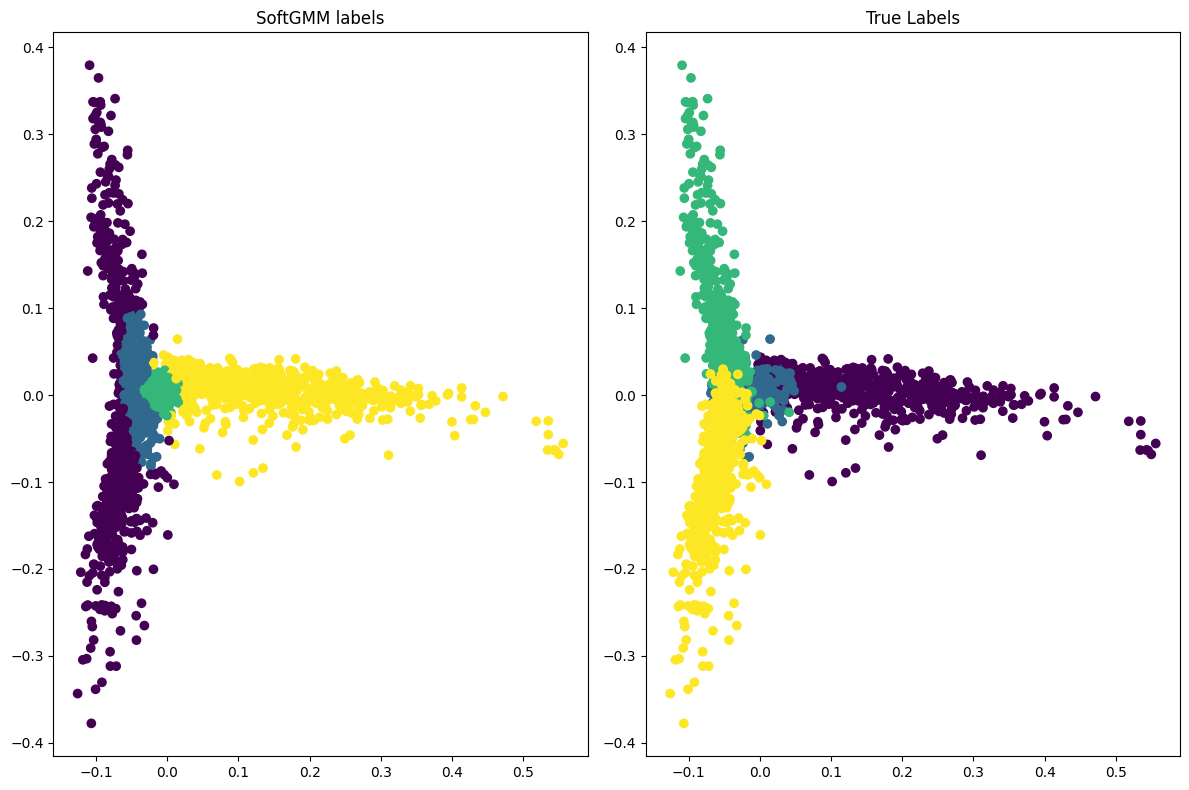

In [384]:
## plot the Soft-GMM outcome
_, axs = plt.subplots(1, 2, figsize=(12, 8), tight_layout=True)
axs[0].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=soft_clusters)
axs[0].set_title('SoftGMM labels')

## plot the original data
axs[1].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=docs.label.cat.codes)
axs[1].set_title('True Labels')

plt.show()

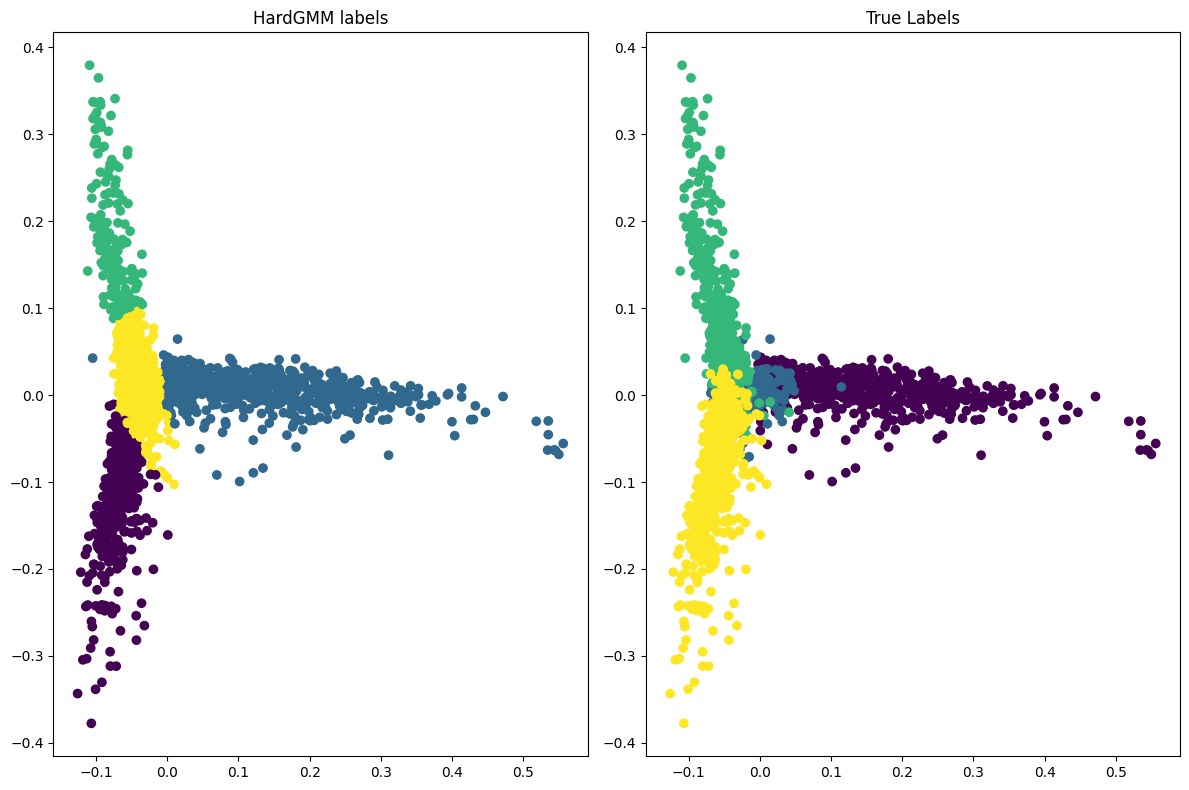

In [390]:
## plot the Hard-GMM outcome
_, axs = plt.subplots(1, 2, figsize=(12, 8), tight_layout=True)
axs[0].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=hard_clusters)
axs[0].set_title('HardGMM labels')

## plot the original data
axs[1].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=docs.label.cat.codes)
axs[1].set_title('True Labels')

plt.show()

# 2 Perceptron vs. Neural Network

## Question 2

### I. Load Task2B_train.csv and Task2B_test.csv datasets, plot the training and testing data separately in two plots. Mark the data with different labels in different colors. Attach the plot to your PDF report submission.

In [393]:
## read the file (each line of the text file is one document)
train = pd.read_csv('Data_set_S1_2023/Task2B_train.csv')
test = pd.read_csv('Data_set_S1_2023/Task2B_test.csv')

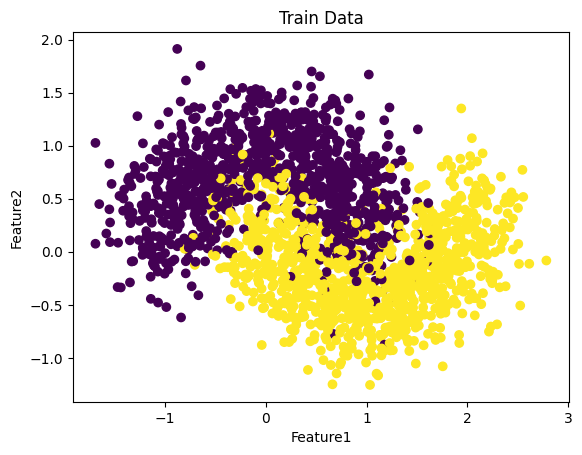

In [394]:
## plot the train data
plt.scatter(x=train.feature1,y=train.feature2, c=train.label)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title('Train Data')
plt.show()

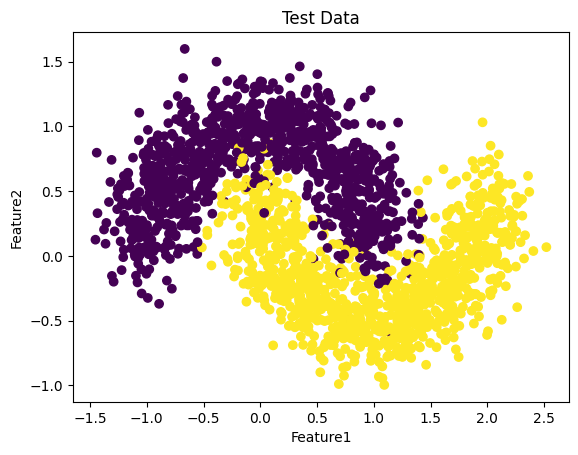

In [395]:
## plot the test data
plt.scatter(x=test.feature1,y=test.feature2, c=test.label)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title('Test Data')
plt.show()

### II. Train two Perceptron models on the loaded training data by setting the learning rates η to 0.1 and 1.0 respectively. Calculate the test errors of two models and find the best η and its corresponding model, then plot the decision boundary and the test data in one plot; attach the plot to your PDF report. Hint: We expect the decision boundary of your perceptron to be a linear function that separates the testing data into two parts. You may also choose to change the labels from [0, 1] to [−1, +1] for your convenience.


In [396]:
from sklearn.linear_model import Perceptron

In [397]:
perceptron_01 = Perceptron(eta0=0.01, alpha=0, tol=5e-3, max_iter=10000)
perceptron_10 = Perceptron(eta0=1.0, alpha=0, tol=5e-3, max_iter=10000)
perceptron_01.fit(train[["feature1", "feature2"]], train["label"])
perceptron_10.fit(train[["feature1", "feature2"]], train["label"])

Perceptron(alpha=0, max_iter=10000, tol=0.005)

#### Error Rate

In [7]:
pred_01 = perceptron_01.predict(test[["feature1", "feature2"]])
error_rate = np.mean(pred_01 != test["label"])
print(f"Test Error(Error Rate) with eta=0.1 : {error_rate}")

pred_10 = perceptron_10.predict(test[["feature1", "feature2"]])
error_rate = np.mean(pred_10 != test["label"])
print(f"Test Error(Error Rate) with eta=1.0 : {error_rate}")

Test Error(Error Rate) with eta=0.1 : 0.1575
Test Error(Error Rate) with eta=1.0 : 0.183


#### Decision Boundary(the best η)

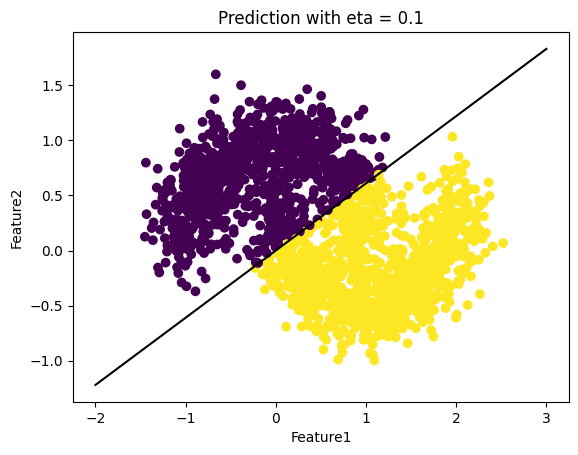

In [8]:
# line segment
ymin, ymax = -2,3
w = perceptron_01.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (perceptron_01.intercept_[0]) / w[1]

# plotting the decision boundary
plt.scatter(x=test.feature1,y=test.feature2, c=pred_01)
plt.plot(xx, yy, 'k-')
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title('Prediction with eta = 0.1')
plt.show()

### III. For each combination of K (i.e, number of units in the hidden layer) in 5, 10, 15, ..., 40, (i.e. from 5 to 40 with a step size of 5), and η (i.e., learning rate) in 0.01, 0.001 run the 3-layer Neural Network and record testing error for each of them. Plot the effect of different K values on the accuracy of the testing data and attach it to your PDF report. Based on this plot, find the best combination of K and η and obtain your best model, then plot the decision boundary and the test data in one plot; attach the plot to your PDF report.

In [410]:
## convert data and labels to matrices
train_x = train[["feature1", "feature2"]].to_numpy()
train_y = train["label"].to_numpy()
test_x = test[["feature1", "feature2"]].to_numpy()
test_y = test["label"].to_numpy()

In [411]:
from sklearn.neural_network import MLPClassifier

best_model = MLPClassifier()
best_accuracy = 0
best_combination = []
accuracy_list = []

for k in range(5, 45, 5):
    accuracy_etas = []
    for eta in [0.01, 0.001]:
        clf = MLPClassifier(hidden_layer_sizes=(k,), learning_rate_init=eta, max_iter=1000)
        clf.fit(train_x, train_y)
        accuracy = (test_y == clf.predict(test_x)).mean() ## get accuracy
        accuracy_etas.append(accuracy) ## append accuracy
        if accuracy > best_accuracy: ## updating and save the best accuracy, best model, and best combination
            best_accuracy = (test_y == clf.predict(test_x)).mean()
            best_model = clf
            best_combination = [k, eta]
    accuracy_list.append(accuracy_etas) ## append accuracy list(of one eta) to accuracy_list

The effect of different K values on the accuracy of the testing data

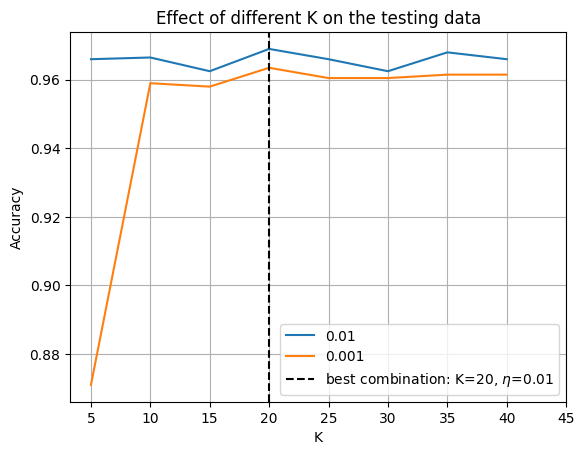

In [412]:
label_string = f'best combination: K={best_combination[0]}, $\eta$={best_combination[1]}'
plt.plot(accuracy_list, label=["0.01", "0.001"])
plt.axvline(best_combination[0]/5-1, color='black', linestyle='--', label=label_string)
plt.xticks(np.arange(0, 9, 1), np.arange(5, 46, 5))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.title("Effect of different K on the testing data")
plt.show()

Decision Boundary

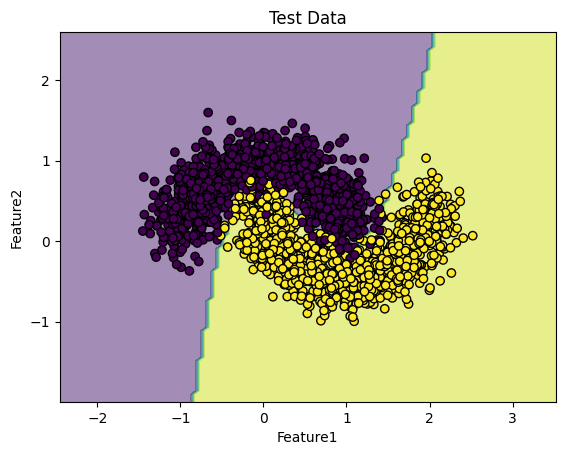

In [413]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
     best_model, test_x, response_method="predict",
     xlabel="Feature1", ylabel="Feature2",
     alpha=0.5)
disp.ax_.scatter(test_x[:, 0], test_x[:, 1], c=test_y, edgecolor="k")
plt.title('Test Data')
plt.show()

### IV. In your PDF report, explain the reason(s) responsible for such difference between Perceptron and a 3-layer Neural Network by comparing the plots you generated in Steps II and III. Hint: Look at the plots and think about the model assumptions.

# 3. Self-Taught Learning

## Question 3

### I. Load Task2C_labeled.csv, Task2C_unlabeled.csv, and Task2C_test.csv datasets, along with the required libraries. Note that we will use both Task2C_labeled.csv and Task2C_unlabeled.csv to train the autoencoder, and only Task2C_labeled.csv to train the classifiers. Finally, we will evaluate the trained classifier on the test dataset Task2C_test.csv.

In [170]:
from sklearn.neural_network import MLPClassifier
from helper_functions import *

In [265]:
## read the file
train_labeled = pd.read_csv('Data_set_S1_2023/Task2C_labeled.csv')
train_unlabeled = pd.read_csv('Data_set_S1_2023/Task2C_unlabeled.csv')
test = pd.read_csv('Data_set_S1_2023/Task2C_test.csv')

### II. Train an autoencoder with only one hidden layer and change the number of its neurons to 20, 60, 100, ..., 220 (i.e. from 20 to 220 with a step size of 40).

In [266]:
autoencoder_df = pd.concat([train_labeled.iloc[:,1:], train_unlabeled], ignore_index=True)

Training Model on cpu
Epoch 0 out of 10. Loss:0.7828440444985616
Epoch 1 out of 10. Loss:0.6248556688888786
Epoch 2 out of 10. Loss:0.5586628735679942
Epoch 3 out of 10. Loss:0.5049970134631875
Epoch 4 out of 10. Loss:0.4651103136465721
Epoch 5 out of 10. Loss:0.43336646519985395
Epoch 6 out of 10. Loss:0.4079316209272011
Epoch 7 out of 10. Loss:0.38742832762678875
Epoch 8 out of 10. Loss:0.37038880494452014
Epoch 9 out of 10. Loss:0.3558772836149353


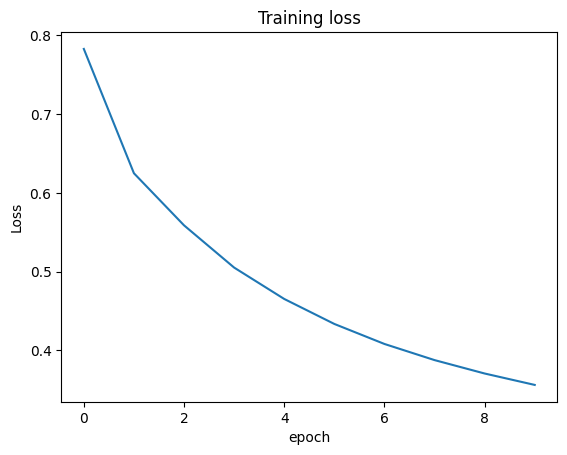

Training Model on cpu
Epoch 0 out of 10. Loss:0.6380331402586907
Epoch 1 out of 10. Loss:0.42512374409695264
Epoch 2 out of 10. Loss:0.3420035918963324
Epoch 3 out of 10. Loss:0.2911347926584716
Epoch 4 out of 10. Loss:0.2579473681056622
Epoch 5 out of 10. Loss:0.23881028654034606
Epoch 6 out of 10. Loss:0.22222476306649827
Epoch 7 out of 10. Loss:0.2081795191949176
Epoch 8 out of 10. Loss:0.19402846663268572
Epoch 9 out of 10. Loss:0.18270158030323147


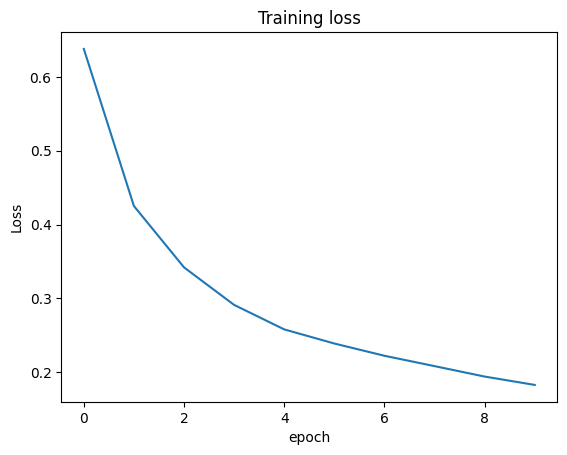

Training Model on cpu
Epoch 0 out of 10. Loss:0.5580633553033022
Epoch 1 out of 10. Loss:0.3362712304002231
Epoch 2 out of 10. Loss:0.25618547600569186
Epoch 3 out of 10. Loss:0.21095059842792982
Epoch 4 out of 10. Loss:0.18376837225304438
Epoch 5 out of 10. Loss:0.16555251380831926
Epoch 6 out of 10. Loss:0.15423402927585483
Epoch 7 out of 10. Loss:0.1443269164445474
Epoch 8 out of 10. Loss:0.1379638576937705
Epoch 9 out of 10. Loss:0.1306949457556931


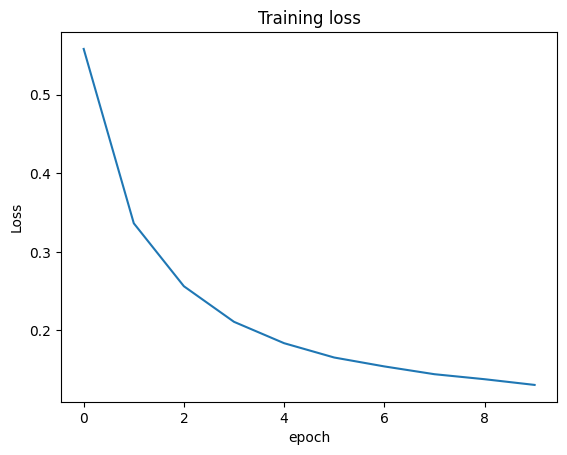

Training Model on cpu
Epoch 0 out of 10. Loss:0.5072543657932085
Epoch 1 out of 10. Loss:0.27787335170912986
Epoch 2 out of 10. Loss:0.204963067296854
Epoch 3 out of 10. Loss:0.16793617851955375
Epoch 4 out of 10. Loss:0.14546634379735926
Epoch 5 out of 10. Loss:0.13074968878141383
Epoch 6 out of 10. Loss:0.12086348250969169
Epoch 7 out of 10. Loss:0.11328261238090771
Epoch 8 out of 10. Loss:0.10388782451447752
Epoch 9 out of 10. Loss:0.09583291449804895


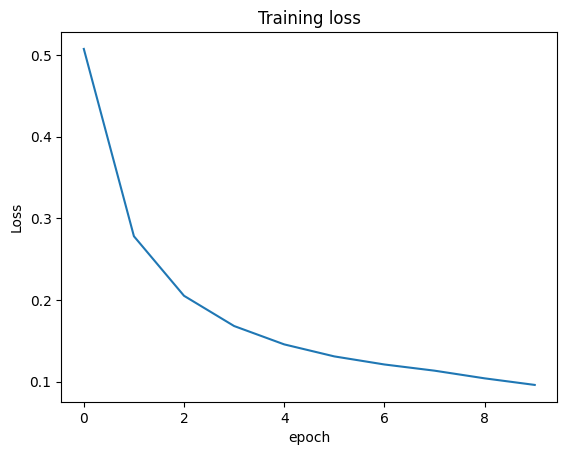

Training Model on cpu
Epoch 0 out of 10. Loss:0.4679535034391069
Epoch 1 out of 10. Loss:0.24160976923003638
Epoch 2 out of 10. Loss:0.17333543730765275
Epoch 3 out of 10. Loss:0.13917573502997763
Epoch 4 out of 10. Loss:0.12002467087556407
Epoch 5 out of 10. Loss:0.10959801853624816
Epoch 6 out of 10. Loss:0.09893901861205544
Epoch 7 out of 10. Loss:0.09124523117062971
Epoch 8 out of 10. Loss:0.0858053643371641
Epoch 9 out of 10. Loss:0.08072327438396276


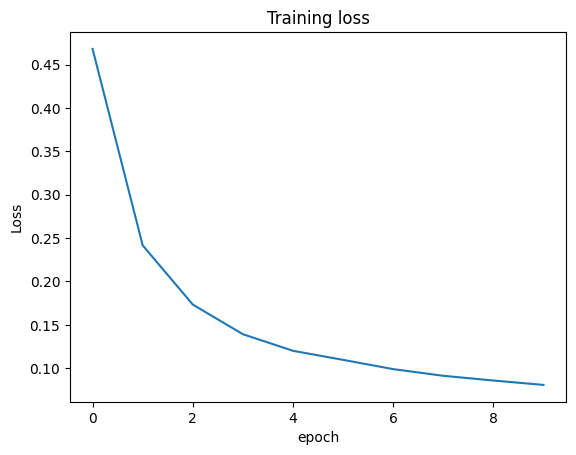

Training Model on cpu
Epoch 0 out of 10. Loss:0.4434487807382013
Epoch 1 out of 10. Loss:0.21697897517804018
Epoch 2 out of 10. Loss:0.15419441676631415
Epoch 3 out of 10. Loss:0.12369096678556855
Epoch 4 out of 10. Loss:0.10778568531434561
Epoch 5 out of 10. Loss:0.0929166228347218
Epoch 6 out of 10. Loss:0.0826971076966561
Epoch 7 out of 10. Loss:0.07685349328616231
Epoch 8 out of 10. Loss:0.07204856074501559
Epoch 9 out of 10. Loss:0.06876080967101854


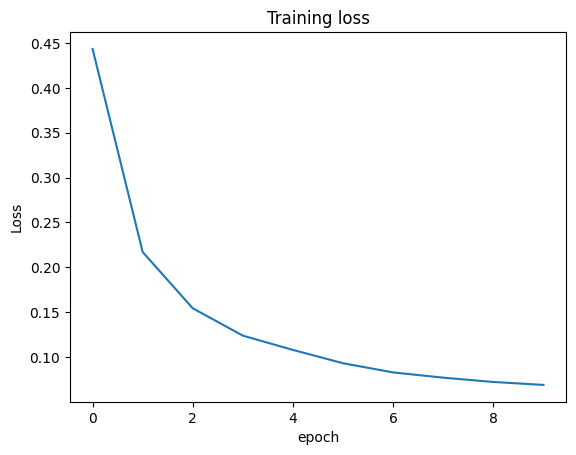

In [267]:
models = []
for neurons in range(20, 260, 40):
    models.append(train_autoencoder(
        X_train = autoencoder_df, # training data
        hidden = [neurons], # number of layers and their units
        epochs = 10, # maximum number of epoches  
        activation = 'Tanh', # activation function
        lr = 0.001   #learning rate
))

### III. For each model in Step II, calculate and record the reconstruction error for the autoencoder, which is simply the average of Euclidian distances between the input and output of the autoencoder. Plot these values where the x-axis is the number of units in the middle layer and the y-axis is the reconstruction error. Then, save and attach the plot to your PDF report. Explain your findings based on the plot in your PDF report.

In [268]:
import torch
input_df = autoencoder_df
avg_distances = []

for model in models:    
    output_df = model(torch.tensor(input_df.values).float()).detach().numpy() # reconstructed_data
    avg_distances.append(np.sqrt(np.sum((input_df - output_df)**2, axis=1)).mean())


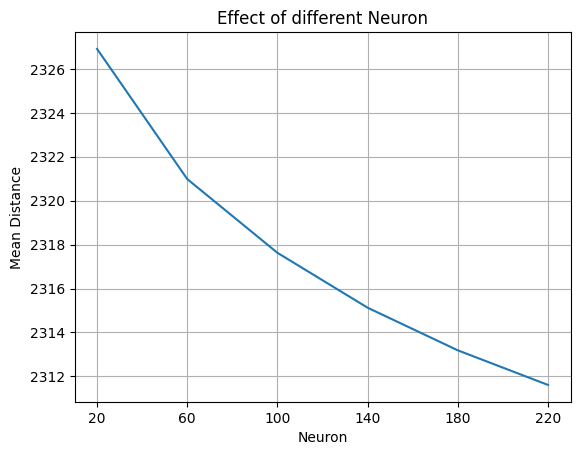

In [269]:
plt.plot(avg_distances)
plt.xticks(np.arange(0, 6, 1), np.arange(20, 260, 40))
plt.xlabel("Neuron")
plt.ylabel("Mean Distance")
plt.grid()
plt.title("Effect of different Neuron")
plt.show()

### IV. Build the 3-layer NN to build a classification model using all the original attributes from the training set and change the number of its neurons to 20, 60, 100, ..., 220 (i.e. from 20 to 220 with a step size of 40). For each model, calculate and record the test error.

In [270]:
## Training and Testing Data Preparation
train_x = train_labeled.iloc[:,1:]
train_y = train_labeled.iloc[:,0]
test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]

In [271]:
from sklearn.neural_network import MLPClassifier

error_rate_list_IV = []

for k in range(20, 260, 40): 
    clf = MLPClassifier(hidden_layer_sizes=(k,), max_iter=3000)
    clf.fit(train_x, train_y)
    error_rate = (test_y != clf.predict(test_x)).mean() ## Calculating test error
    print(f"Neuron {k} error rate:{error_rate}")
    error_rate_list_IV.append(error_rate) ## Recording test error


Neuron 20 error rate:0.652
Neuron 60 error rate:0.59
Neuron 100 error rate:0.508
Neuron 140 error rate:0.54
Neuron 180 error rate:0.524
Neuron 220 error rate:0.522


In [272]:
error_rate_list_IV

[0.652, 0.59, 0.508, 0.54, 0.524, 0.522]

### V. Build augmented self-taught networks using the models learnt in Step II. For each model: 
- ### 1) Add the output of the middle layer of an autoencoder as extra features to the original feature set; 
- ### 2) Train a new 3-layer Neural Network using all features (original + extra) and varying the number of hidden neurons (like Step IV) as well. Then calculate and record the test error. For example, each model should be developed as follows: Model 1: 20 hidden neurons + extra 20 features (from an autoencoder), Model 2: 40 hidden neurons + extra 40 features (from an autoencoder), ..., Model 5: 220 hidden neurons + extra 220 features (from an autoencoder).

In [273]:
error_rate_list_V = []

for model in models:
    ## get extra features
    extra_features_train = get_deepfeatures(model, train_x, layer_number=1)
    extra_features_test = get_deepfeatures(model, test_x, layer_number=1)
    
    ## column bind features
    all_features_train = train_x.merge(pd.DataFrame(extra_features_train), left_index=True, right_index=True)
    all_features_test = test_x.merge(pd.DataFrame(extra_features_test), left_index=True, right_index=True)

    ## column names to string
    all_features_train.columns = all_features_train.columns.astype(str)
    all_features_test.columns = all_features_test.columns.astype(str)
    
    ## fitting classifiers and calculating error rate
    k = extra_features_train.shape[1] ## k = neurons
    clf = MLPClassifier(hidden_layer_sizes=(k,), max_iter=3000)
    clf.fit(all_features_train, train_y)
    error_rate = (test_y != clf.predict(all_features_test)).mean() ## Calculating test error
    print(f"Neuron {k} error rate:{error_rate}")
    error_rate_list_V.append(error_rate) ## Recording test error

Neuron 20 error rate:0.62
Neuron 60 error rate:0.636
Neuron 100 error rate:0.554
Neuron 140 error rate:0.538
Neuron 180 error rate:0.514
Neuron 220 error rate:0.442


### VI. Plot the error rates for the 3-layer neural networks from Step IV and the augmented self-taught networks from Step V, while the x-axis is the number of hidden neurons and y-axis is the classification error. Save and attach the plot to your PDF report. In your pdf, explain how the performance of the 3-layer neural networks and the augmented self-taught networks is different and why they are different or why they are not different, based on the plot.

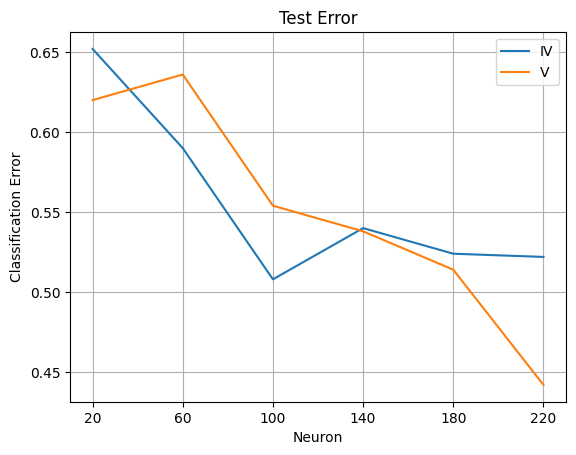

In [274]:
plt.plot(error_rate_list_IV, label="IV")
plt.plot(error_rate_list_V, label="V")
plt.xticks(np.arange(0, 6, 1), np.arange(20, 260, 40))
plt.xlabel("Neuron")
plt.ylabel("Classification Error")
plt.grid()
plt.legend()
plt.title("Test Error")
plt.show()